In [1]:
# 경사하강법을 파이썬 코드로 구현

In [2]:
import numpy as np
import matplotlib.pyplot as plt

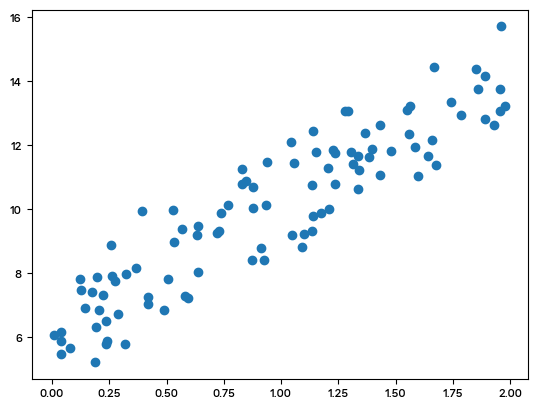

In [3]:
np.random.seed(0)
X = 2 * np.random.rand(100,1)
# X
y = 6 + 4 * X + np.random.randn(100,1) # np.random.randn(100,1): 노이즈, 에러 /randn: 정규분포 형태에서 
plt.scatter(X,y)

In [4]:
# 오류함수
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

![행렬곱](img/행렬곱.png)

In [5]:
def get_weight_update(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1) # w1: 회기계수, 가중치
    w0_update = np.zeros_like(w0) # w0: 바이어스 값
    y_pred = np.dot(X, w1.T) + w0 # y_pred: 예측/ 행렬 곱: (mxk),(kxn)식으로 행렬 앞뒤 인수들이 일치해야 처리 가능, 결과는(mxn)
    diff = y - y_pred
    w0_factors = np.ones((N,1))
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff)) # dot 행렬 연산
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff)) # w0_factors:1이라 diff값 그대로 나옴 *1이라서
    return w1_update, w0_update

In [6]:
def gradient_descent_steps(X,y,iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    for ind in range(iters):
        w1_update, w0_update = get_weight_update(w1,w0,X,y)
        w1 = w1 - w1_update 
        w0 = w0 - w0_update
    return w1, w0

In [7]:
w1, w0 = gradient_descent_steps(X,y,iters=10000000)

In [8]:
# 4X + 6
w1, w0

(array([[3.96846751]]), array([[6.22215108]]))

In [9]:
y_pred = w1 * X + w0

In [10]:
get_cost(y, y_pred)

0.9924386487246484

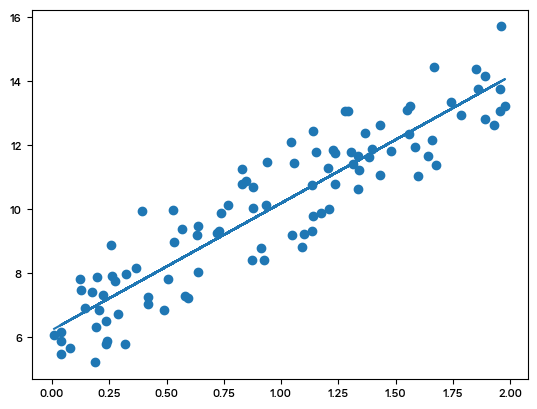

In [11]:
plt.scatter(X,y)
plt.plot(X, y_pred)

In [ ]:
# 경사하강법은 모든 학습 데이터에 반복저긍로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 단점이 있음, 그 때문에 실전에서는 대부분 확률적 경사 하강법을 이용하는데 전체 데이터가 아닌 일부 데이터를 활용함